# P2: Investigate a Dataset

### Source: 2014 Lahman’s Baseball Database.

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import Salaries data
filename = 'Salaries.csv'
salariesDF = pd.read_csv(filename)

# import Players data
filename = 'AwardsSharePlayers.csv'
playersDF = pd.read_csv(filename)

salariesDF.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [158]:
playersDF.head()

,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0






And I am going to see if there is any null value in the data.
First salaries data.

In [160]:
pd.isnull(salariesDF).sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

In [161]:
salariesDF.describe()

,yearID,salary
count,24758.000000,2.475800e+04
mean,1999.891752,1.932905e+06
std,8.324492,3.190334e+06
min,1985.000000,0.000000e+00
25%,1993.000000,2.600000e+05
50%,2000.000000,5.250000e+05
75%,2007.000000,2.199643e+06
max,2014.000000,3.300000e+07






Although there is no null value in the data, there are some zeros in salary column. I am going to find these rows with zero salary.

In [162]:
salariesDF[salariesDF["salary"] == 0]

,yearID,teamID,lgID,playerID,salary
6179,1993,NYA,AL,jamesdi01,0
12007,1999,PIT,NL,martija02,0





There are total two players with 0 salary. I am going to find more details about those two players.

In [163]:
salariesDF[salariesDF["playerID"] == "jamesdi01"]

,yearID,teamID,lgID,playerID,salary
1302,1987,ATL,NL,jamesdi01,120000
1929,1988,ATL,NL,jamesdi01,360000
2591,1989,ATL,NL,jamesdi01,400000
3536,1990,CLE,AL,jamesdi01,650000
5293,1992,NYA,AL,jamesdi01,387500
6179,1993,NYA,AL,jamesdi01,0
8019,1995,NYA,AL,jamesdi01,350000


In [164]:
salariesDF[salariesDF["playerID"] == "martija02"]

,yearID,teamID,lgID,playerID,salary
11011,1998,PIT,NL,martija02,170000
12007,1999,PIT,NL,martija02,0





Clearly for jamesdi01, the 0 value is wrong. I am going to assume the salary in 1993 as the average of 1992 and 1995. For martija02, I will ignore these two rows from the database.



In [165]:
# Taking care of jamesdi01
salariesDF["salary"].iloc[6179] = (387500 + 350000) / 2
salariesDF[salariesDF["playerID"] == "jamesdi01"]

,yearID,teamID,lgID,playerID,salary
1302,1987,ATL,NL,jamesdi01,120000
1929,1988,ATL,NL,jamesdi01,360000
2591,1989,ATL,NL,jamesdi01,400000
3536,1990,CLE,AL,jamesdi01,650000
5293,1992,NYA,AL,jamesdi01,387500
6179,1993,NYA,AL,jamesdi01,368750
8019,1995,NYA,AL,jamesdi01,350000


In [166]:
# Taking care of martija02
salariesDF = salariesDF[salariesDF["playerID"] != "martija02"]
salariesDF.describe()

,yearID,salary
count,24756.000000,2.475600e+04
mean,1999.891865,1.933069e+06
std,8.324817,3.190411e+06
min,1985.000000,1.090000e+04
25%,1993.000000,2.600000e+05
50%,2000.000000,5.250000e+05
75%,2007.000000,2.200000e+06
max,2014.000000,3.300000e+07


Now I am going to clean the AwardsSharePlayers data.

In [167]:
# Printout the total number of null values of each column
pd.isnull(playersDF).sum()

awardID         0
yearID          0
lgID            0
playerID        0
pointsWon       0
pointsMax       0
votesFirst    358
dtype: int64

In [168]:
playersDF.describe()

,yearID,pointsWon,pointsMax,votesFirst
count,6705.000000,6705.000000,6705.000000,6347.000000
mean,1971.344817,43.168829,266.107233,1.612573
std,27.172773,67.714919,128.980771,4.868226
min,1911.000000,0.000000,16.000000,0.000000
25%,1950.000000,4.000000,140.000000,0.000000
50%,1974.000000,12.000000,336.000000,0.000000
75%,1994.000000,52.000000,336.000000,0.000000
max,2014.000000,448.000000,448.000000,32.000000


Although there are 358 null values in "votesFirst" column, I don't plan to use this column. Since other columns don't have a null value, I can leave this data as it is.

Now salary is investigated using the single-variable (1d) exploration

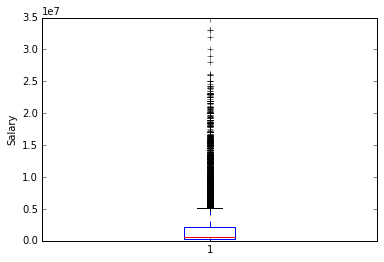

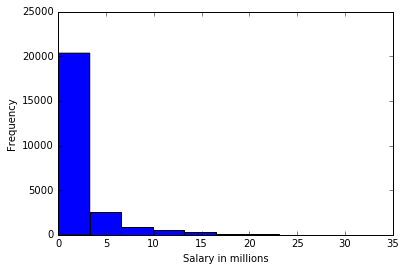

In [138]:
# single-variable investigation - Salary
# plot boxplot and histogram
%matplotlib inline
plt.boxplot(salariesDF["salary"])
plt.ylabel("Salary")
plt.show()
plt.hist(salariesDF["salary"]/1000000, bins = 10)
plt.ylabel("Frequency")
plt.xlabel("Salary in millions")
plt.show()

In histogram, you can see that the most of the salaries are below 5 millions and very little number of people are more than 5 millions range.
However, the box plot is very difficult to understand because there are too many points and most of them seem to be outliers. In order to decrease the number of points, the set of the mean salaries per year is used to plot the boxplot.

In [169]:
# Get a dataframe of the set of the mean salaries per year
salaryYearDF = salariesDF[["yearID","salary"]].groupby("yearID").mean()
salaryYearDF

,salary
yearID,
1985,476299
1986,417147
1987,434729
1988,453171
1989,506323
1990,511973
1991,894961
1992,1047520
1993,977366


Now plot the boxplot using this dataframe.

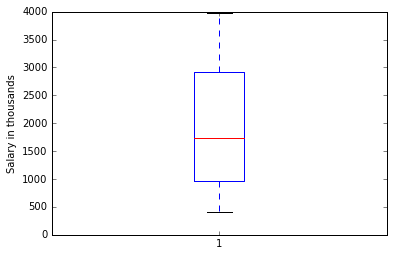

Mean: 1902124.83333
Median: 1739889.0


In [140]:
# plotting box plot and histogram
%matplotlib inline
plt.boxplot(salaryYearDF.values / 1000)
plt.ylabel("Salary in thousands")
plt.show()

meanYearDF = float(salaryYearDF.mean())
medianYearDF = float(salaryYearDF.median())
print "Mean:", meanYearDF
print "Median:", medianYearDF

Mean is greater than Median as expected since the historam above shows the right skewed graph. 



Now I am going to investigate the relation between the teamID and salaries.
Find sum, max, min, mean of salaries by team ids.

In [170]:
# Database with two columns: teamID and salary
salariesDF_reduced = salariesDF[["teamID","salary"]]

salariesDF_summary_by_teamID = salariesDF_reduced.groupby("teamID").agg([np.sum,np.max,np.min,np.mean])
salariesDF_summary_by_teamID.columns = ["sum", "max", "min", "mean"]
salariesDF_summary_by_teamID.head()

,sum,max,min,mean
teamID,,,,
ANA,468091973,13166667,150000,1895109
ARI,1209975228,16000000,170000,2499948
ATL,1882946784,16061802,60000,2184393
BAL,1630200038,17000000,60000,1846206
BOS,2432700935,22500000,60000,2755040


In [142]:
def bargraph(column): # column = sum, max, min, mean
	frequency = salariesDF_summary_by_teamID[column].sort_values(axis=0, ascending = False).head(10)
	objects = frequency.index
	y_pos = np.arange(len(objects))
	plt.bar(y_pos, frequency, align='center')
	plt.xticks(y_pos, objects)
	plt.ylabel('Salary')
	plt.title("Top 10 {} of salaries by teamID".format(column))
	print "Top 10 {} of salaries by teamID".format(column)
	print frequency
	plt.show()




Change False to True to see the bargraphs.

Top 10 sum of salaries by teamID
teamID
NYA    3283488084
BOS    2432700935
LAN    2237766703
PHI    1982355800
NYN    1965737231
ATL    1882946784
CHN    1859833315
SLN    1775631332
DET    1771197687
CHA    1699865143
Name: sum, dtype: int64


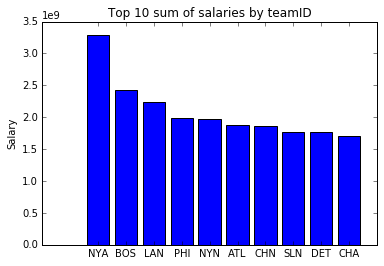

Top 10 max of salaries by teamID
teamID
NYA    33000000
LAA    26187500
LAN    26000000
PHI    25000000
TEX    24000000
SEA    24000000
NYN    23145011
DET    23000000
MIN    23000000
BOS    22500000
Name: max, dtype: int64


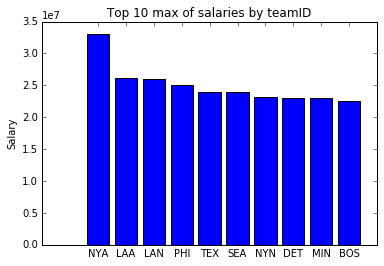

Top 10 min of salaries by teamID
teamID
NYM    501560
SFG    500500
MIA    480000
WAS    316000
LAA    316000
ARI    170000
MIL    170000
TBA    170000
ANA    150000
COL    109000
Name: min, dtype: int64


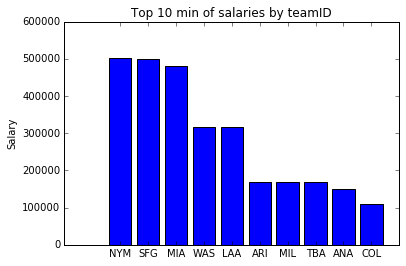

Top 10 mean of salaries by teamID
teamID
SFG    5315191
LAA    4186119
NYA    3735481
BOS    2755040
LAN    2505897
ARI    2499948
MIA    2480984
WAS    2466758
NYN    2345748
NYM    2283624
Name: mean, dtype: int64


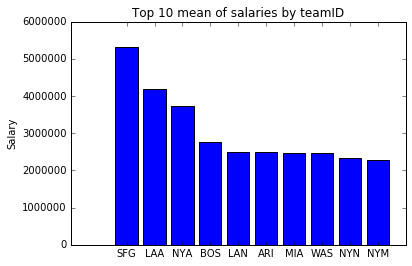

In [143]:
""" Bar graph of the number of players by teamID """
if True:
    %matplotlib inline
    bargraph("sum")
    bargraph("max")
    bargraph("min")
    bargraph("mean")


### multiple-variable (2d) explorations

I believe that the player' pointsWon affects salaries. (i.e. palyers with more points have higher salaries)
So I set the pointsWon as an independent variable and salary as a dependent variable.

First, I reindex the salary dataframe with a key value set (year, player ID) so that I can join the two dataframes.

In [153]:
# Set key value as (year, player ID) for salariesDF
keyValue = ("{}, {}".format(salariesDF["yearID"].iloc[i],salariesDF["playerID"].iloc[i]) for i in range(len(salariesDF)))

salariesDFkv = pd.DataFrame(salariesDF.values, columns = list(salariesDF.columns.values), index = list(keyValue))
salariesDFkv

,yearID,teamID,lgID,playerID,salary
"1985, barkele01",1985,ATL,NL,barkele01,870000
"1985, bedrost01",1985,ATL,NL,bedrost01,550000
"1985, benedbr01",1985,ATL,NL,benedbr01,545000
"1985, campri01",1985,ATL,NL,campri01,633333
"1985, ceronri01",1985,ATL,NL,ceronri01,625000
"1985, chambch01",1985,ATL,NL,chambch01,800000
"1985, dedmoje01",1985,ATL,NL,dedmoje01,150000
"1985, forstte01",1985,ATL,NL,forstte01,483333
"1985, garbege01",1985,ATL,NL,garbege01,772000
"1985, harpete01",1985,ATL,NL,harpete01,250000


Similarly reindex the award dataframe with the key value set.

In [179]:
# Set key value as (year, player ID) for playersDF
keyValue = ("{}, {}".format(playersDF["yearID"].iloc[i],playersDF["playerID"].iloc[i]) for i in range(len(playersDF)))

playersDFkv = pd.DataFrame(playersDF.values, columns = list(playersDF.columns.values), index = list(keyValue))
playersDFkv.head()

,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
"1956, fordwh01",Cy Young,1956,ML,fordwh01,1,16,1
"1956, maglisa01",Cy Young,1956,ML,maglisa01,4,16,4
"1956, newcodo01",Cy Young,1956,ML,newcodo01,10,16,10
"1956, spahnwa01",Cy Young,1956,ML,spahnwa01,1,16,1
"1957, donovdi01",Cy Young,1957,ML,donovdi01,1,16,1


Create new database that joins the salary dataframe with the player dataframe.

In [208]:
salaryPlayerDF = pd.merge(salariesDFkv, playersDFkv, how = "inner")
salaryPlayerDF.head()

,yearID,teamID,lgID,playerID,salary,awardID,pointsWon,pointsMax,votesFirst
0,1985,ATL,NL,murphda05,1625000,MVP,63,336,0
1,1985,BAL,AL,murraed02,1472819,MVP,130,392,0
2,1985,BAL,AL,ripkeca01,800000,MVP,9,392,0
3,1985,BOS,AL,boggswa01,1000000,MVP,159,392,0
4,1985,BOS,AL,gedmari01,477500,MVP,1,392,0


I now have a merged dataframe so I can find the correlation between pointsWon and salary.
First I am going to standardize each column for pointsWon and salary.

In [ ]:
# Standardizing
def standard(sr):
    return (sr - sr.mean())/sr.std(ddof=0)

salaryPlayerDF = salaryPlayerDF[["pointsWon", "salary"]]

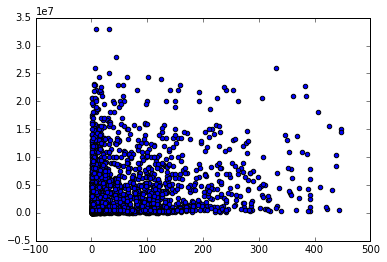

In [213]:
# Scatter plot for awardsWon and salary
%matplotlib inline
plt.scatter(salaryPlayerDF["pointsWon"], salaryPlayerDF["salary"])
plt.show()





This part is for looking at the trend of the salary change whether it increases or decreases.

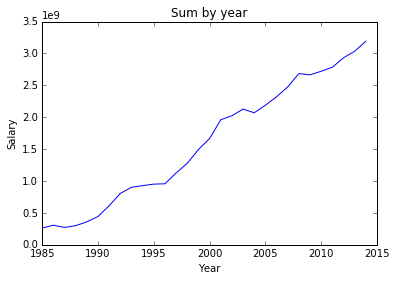

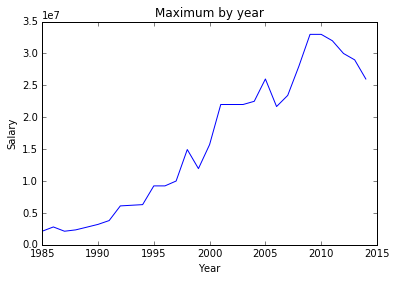

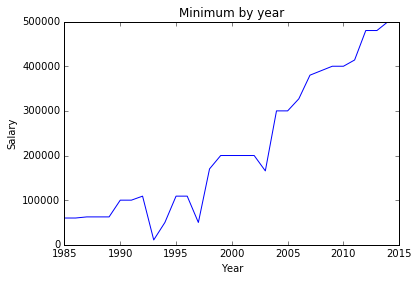

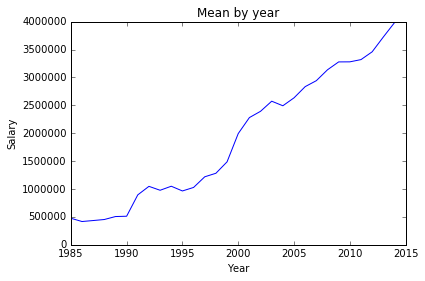

In [14]:
""" data by year """
salariesDF_by_year = salariesDF[["yearID","salary"]].groupby("yearID").agg([np.sum,np.max,np.min,np.mean])
salariesDF_by_year.columns = ["sum", "max", "min", "mean"]

if True:
    %matplotlib inline
    plt.title('Sum by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["sum"])
    plt.show()
    plt.title('Maximum by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["max"])
    plt.show()
    plt.title('Minimum by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["min"])
    plt.show()
    plt.title('Mean by year')
    plt.xlabel('Year')
    plt.ylabel('Salary')
    plt.plot(salariesDF_by_year.index, salariesDF_by_year["mean"])
    plt.show()



All of these factors increase as year gets close to 2014. But when you look at the second graph there is a peak around at 2010 and I decided to analyze that.



In [15]:
""" Finding maximum year """
maxSalaryByYear = salariesDF_by_year["max"].argmax()
print "\nMaximum salary occurs in {}, $ {}\n".format(maxSalaryByYear, salariesDF_by_year["max"].loc[maxSalaryByYear])


Maximum salary occurs in 2009, $ 33000000



In [16]:
""" Find player with the maximum in 2009 """
maxDFyear = salariesDF[salariesDF["yearID"]==2009]
maxPlayer2009 = maxDFyear[maxDFyear["salary"] == salariesDF_by_year["max"].loc[maxSalaryByYear]]
maxPlayerID = maxPlayer2009["playerID"].values[0]
print maxPlayerID
print "Detailed information of the player"
print maxPlayer2009, "\n"


rodrial01
Detailed information of the player
       yearID teamID lgID   playerID    salary
20286    2009    NYA   AL  rodrial01  33000000 





The maximum value occurs in 2009 and the team id and player id is shown above. He had the highest salary of all time.



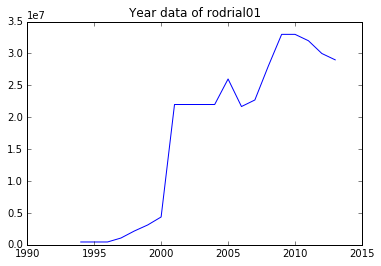

In [33]:
""" maximum player's yearly graph """
maxPlayerDF = salariesDF[salariesDF["playerID"] == maxPlayerID]

if True:
    %matplotlib inline
    plt.plot(maxPlayerDF["yearID"], maxPlayerDF["salary"])
    plt.title("Year data of {}".format(maxPlayerID))
    plt.show()



He started from very low salary and reached to the highest salary range in 2009. Although the salary goes down after 2010, he is the highest paid player.

The correlation between year and salary is calculated. The correlation will be between -1 and 1. I expect the range would be positive since there is an increase in salary as year goes to 2014.



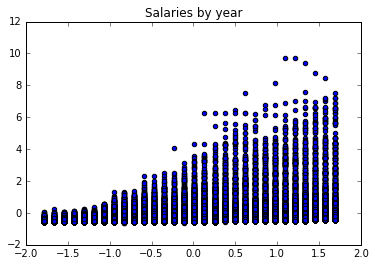

In [34]:
""" Relationship between year and salary """
salaryYearDF = salariesDF[["yearID","salary"]]
standardizedDF = salaryYearDF.apply(standard)

if True:
    %matplotlib inline
    plt.scatter(standardizedDF["yearID"], standardizedDF["salary"])
    plt.title("Salaries by year")
    plt.show()

The code above first take yearID and salary columns and standardize those two columns. And then, the mean of product of each x coordinate and y coordinate is calculated. One interesting thing to note is that although the highest paid salaries is getting increased, the minimum salaries are almost consistent.



In [35]:
""" Calculating correlation """
correlation = (standardizedDF["yearID"] * standardizedDF["salary"]).mean()
print "Correlation between salaries and year:",correlation

Correlation between salaries and year: 0.345339080873


As expected the correlation comes out as a positive number. There is a positive correlation between year and players' salaries.



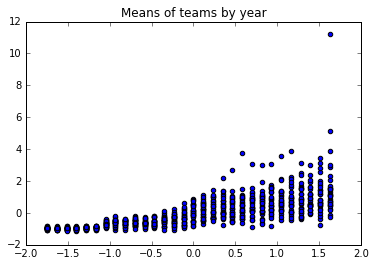

In [36]:
""" Relationship between year and salary """
salaryYearDF = salariesDF[["yearID","teamID","salary"]].groupby(["yearID","teamID"]).mean()

x = salaryYearDF.index.values
x = np.array(map(lambda x: int(x[0]), x))

y = salaryYearDF.values.reshape(1, len(salaryYearDF.values))[0]

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

if True:
    %matplotlib inline
    plt.scatter(x,y)
    plt.title("Means of teams by year")
    plt.show()

This graph is showing only the means of teams' salaries not the entire salaries of players. As you can see that the number of points have been reduced compared to the previous graph. The mean of each team is calculated by using "groupby" in pandas. Another notable difference is that the minimum salaries of each year is increasing. We might be able to expect more positive correlation. Since there will be less negative values when we calculate the mean.

In [37]:
""" Calculating correlation """
correlation = (x * y).mean()
print "Correlation between mean salaries by team and year:", correlation


Correlation between mean salaries by team and year: 0.725273264404




As expected, the correlation is calculated to be a positive number and is greater than the previous correlation value. So there is an obvious trend of increase in salaries.

Lastly, I decide to find the highest paid basedball team in 2014 because when you look at the scatter plot above, the highest paid team in 2014 is the highest paid of all time.



In [38]:
""" Find the country with the maximum mean in 2014 """
salaryYearDF = pd.DataFrame((salaryYearDF.index.values), index =np.array(range(len(salaryYearDF))), columns = ["mean"])

salaryYearDFyear = salaryYearDF["mean"].map(lambda x: x[0])
salaryYearDFteam = salaryYearDF["mean"].map(lambda x: x[1])
salaryYearDFsalary = pd.DataFrame(y, index =np.array(range(len(salaryYearDF))), columns = ["mean"])

maxidxSalary2014 = salaryYearDFsalary[salaryYearDFyear == 2014].idxmax()
maxTeam2014 = salaryYearDFteam[maxidxSalary2014.values[0]]
print "Team with the maximum mean of salaries in 2014:", maxTeam2014


Team with the maximum mean of salaries in 2014: SFN
